## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
data['Dependents'] = data['Dependents'].astype('object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            576 non-null    object 
 1   Gender             576 non-null    object 
 2   Married            576 non-null    object 
 3   Dependents         576 non-null    object 
 4   Education          576 non-null    object 
 5   Self_Employed      576 non-null    object 
 6   ApplicantIncome    576 non-null    float64
 7   CoapplicantIncome  576 non-null    float64
 8   LoanAmount         576 non-null    float64
 9   Loan_Amount_Term   576 non-null    float64
 10  Credit_History     576 non-null    float64
 11  Property_Area      576 non-null    object 
 12  Loan_Status        576 non-null    object 
dtypes: float64(5), object(8)
memory usage: 63.0+ KB


In [4]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [5]:
data.describe(include=object)

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,598,598,598,598,598,598,598
unique,598,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,487,388,465,488,225,411


In [6]:
data['Loan_Status'].value_counts()

Y    411
N    187
Name: Loan_Status, dtype: int64

## Taking care of missing data/ null values

In [7]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

#### Replacing null values with median for numeric data type

In [8]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].median())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outliers detection & handling

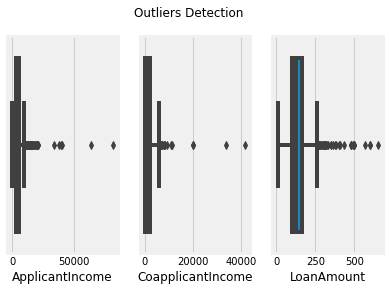

In [10]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 3, 1)
sns.boxplot(x = data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(x = data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(x = data['LoanAmount'])

plt.suptitle('Outliers Detection')
plt.show()

In [11]:
print("Before removing the outliers:", data.shape)

data = data[data['ApplicantIncome'] < 25000]

print("After removing the outliers:", data.shape)

Before removing the outliers: (598, 13)
After removing the outliers: (592, 13)


In [12]:
print("Before removing the outliers:", data.shape)

data = data[data['CoapplicantIncome'] < 12000]

print("After removing the outliers:", data.shape)

Before removing the outliers: (592, 13)
After removing the outliers: (588, 13)


In [13]:
print("Before removing the outliers:", data.shape)

data = data[data['LoanAmount'] < 400]

print("After removing the outliers:", data.shape)

Before removing the outliers: (588, 13)
After removing the outliers: (576, 13)


## Analysis

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

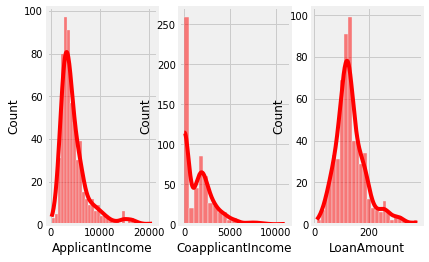

In [14]:
plt.subplot(1, 3, 1)
sns.histplot(data['ApplicantIncome'], color='red', kde=True)

plt.subplot(1, 3, 2)
sns.histplot(data['CoapplicantIncome'], color='red', kde=True)

plt.subplot(1, 3, 3)
sns.histplot(data['LoanAmount'], color='red', kde=True)

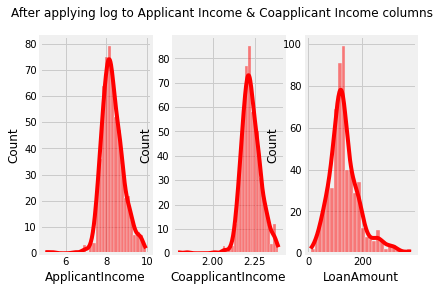

In [15]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['ApplicantIncome'])

plt.subplot(1, 3, 1)
sns.histplot(data['ApplicantIncome'], color='red', kde=True)

plt.subplot(1, 3, 2)
sns.histplot(data['CoapplicantIncome'], color='red', kde=True)

plt.subplot(1, 3, 3)
sns.histplot(data['LoanAmount'], color='red', kde=True)

plt.suptitle('After applying log to Applicant Income & Coapplicant Income columns')
plt.show()

## Analysis of categorical data

In [26]:
categorical_col = data.select_dtypes(include='object').columns
cat = categorical_col[1:-1]

In [27]:
categorical_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

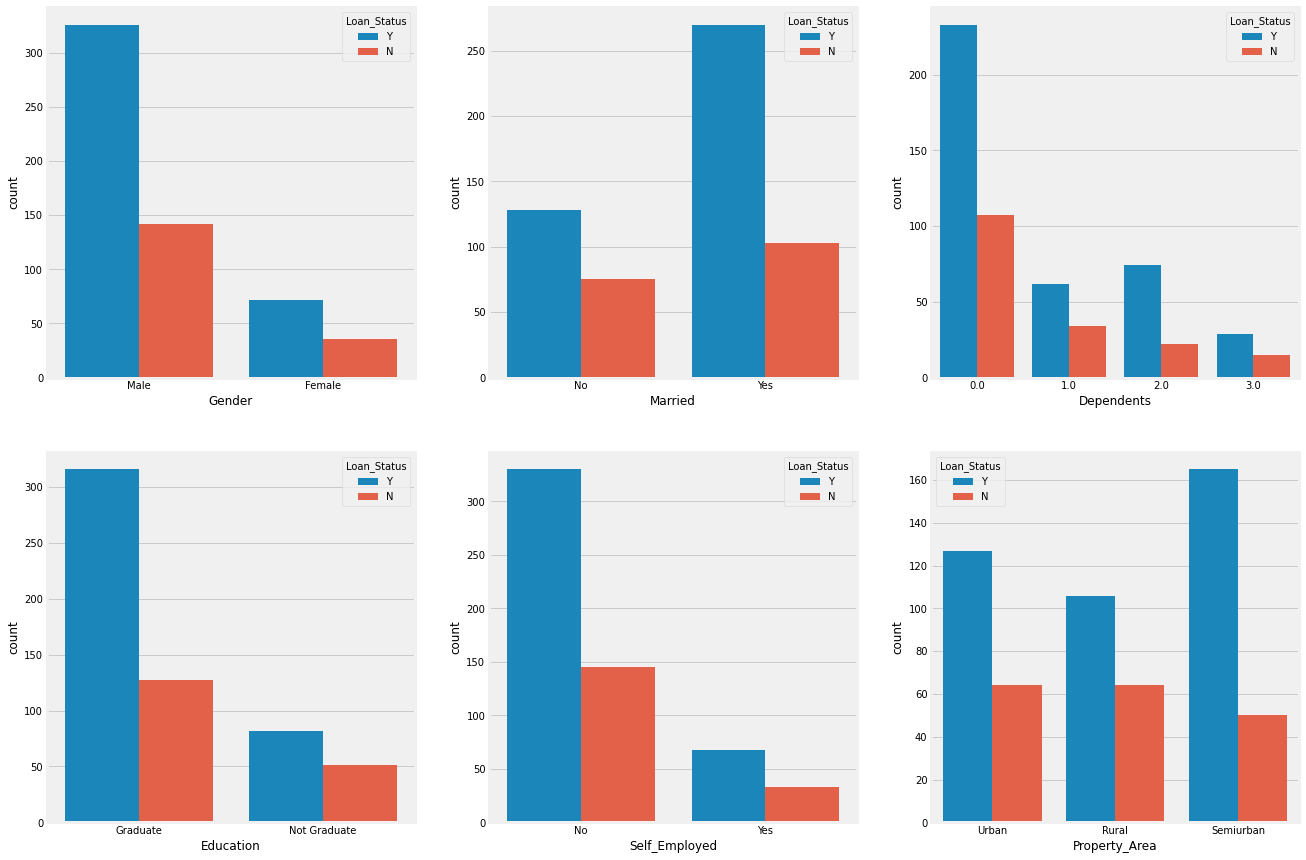

In [30]:
fig, axes = plt.subplots(figsize=(20, 15), nrows=2, ncols=3)

for ax, column in zip(axes.flatten(), cat):
    sns.countplot(x=data[column], ax=ax, hue=data['Loan_Status'])

#### Categorical with target variable

In [31]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             75  103
Y            128  270


In [33]:
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 127            51
Y                 316            82


In [34]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 64         50     64
Y                106        165    127


In [35]:
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              145   33
Y              330   68


## Preparing the dataset

In [36]:
data.select_dtypes(include='object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,Urban,Y


#### Dropping the Loan_ID column

In [37]:
data = data.drop(['Loan_ID'], axis=1)

In [38]:
data.select_dtypes(include='object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,Urban,Y
1,Male,Yes,1.0,Graduate,No,Rural,N
2,Male,Yes,0.0,Graduate,Yes,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,Urban,Y
4,Male,No,0.0,Graduate,No,Urban,Y


In [39]:
data['Dependents'].value_counts()

0.0    340
1.0     96
2.0     96
3.0     44
Name: Dependents, dtype: int64

In [42]:
data['Property_Area'].value_counts()

Semiurban    215
Urban        191
Rural        170
Name: Property_Area, dtype: int64

In [43]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'), (1, 0))
data['Married'] = data['Married'].replace(('Yes', 'No'), (1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'), (1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'), (1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'), (1,1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3'), (0,1,1,1))

In [44]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,8.674026,2.269445,127.0,360.0,1.0,1,1
1,1,1,1.0,1,0,8.430109,2.243908,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,8.006368,2.197932,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,7.856707,2.181175,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,8.699515,2.272076,141.0,360.0,1.0,1,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             576 non-null    int64  
 1   Married            576 non-null    int64  
 2   Dependents         576 non-null    float64
 3   Education          576 non-null    int64  
 4   Self_Employed      576 non-null    int64  
 5   ApplicantIncome    576 non-null    float64
 6   CoapplicantIncome  576 non-null    float64
 7   LoanAmount         576 non-null    float64
 8   Loan_Amount_Term   576 non-null    float64
 9   Credit_History     576 non-null    float64
 10  Property_Area      576 non-null    int64  
 11  Loan_Status        576 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 58.5 KB


In [46]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      472
CoapplicantIncome    472
LoanAmount           185
Loan_Amount_Term      10
Credit_History         2
Property_Area          2
Loan_Status            2
dtype: int64

## Correlation in Data

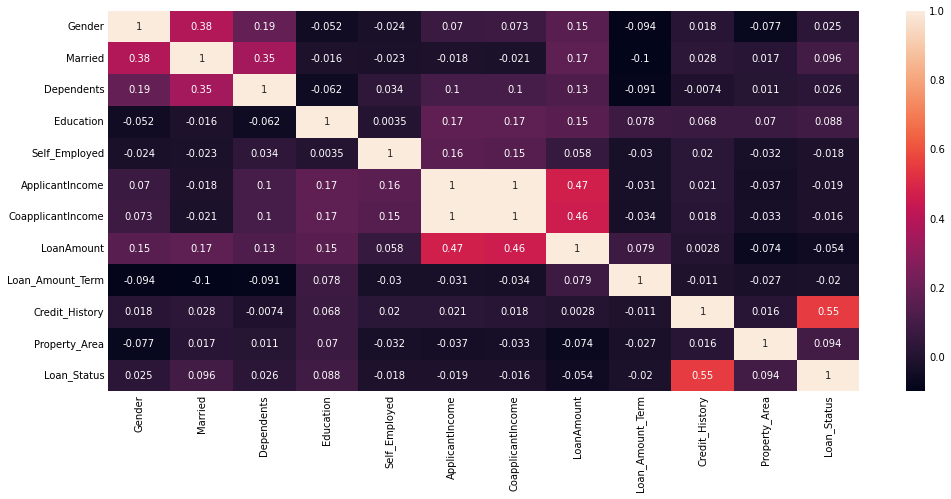

In [57]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

- Credit History is Highly correlated to our target.
- Self Employed, Applicant Income, Coapplicant Income, Loan Amount, Loan Amount Term has Negative correlation.
- Gender, Married & Dependents are correlated.

## Splitting Dataset

In [58]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,8.674026,2.269445,127.0,360.0,1.0,1,1
1,1,1,1.0,1,0,8.430109,2.243908,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,8.006368,2.197932,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,7.856707,2.181175,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,8.699515,2.272076,141.0,360.0,1.0,1,1


In [59]:
x = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [60]:
x.shape

(576, 11)

In [62]:
y.shape

(576,)

## Handlling Imbalanced Data

In [65]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [66]:
from imblearn.over_sampling import SMOTE

In [68]:
x_resample, y_resample = SMOTE().fit_resample(x, y)

In [69]:
print(x_resample.shape)
print(y_resample.shape)

(796, 11)
(796,)


## Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2)

In [79]:
x_train.shape, x_test.shape

((636, 11), (160, 11))

In [80]:
y_train.shape, y_test.shape

((636,), (160,))

## Creating model function to test multiple models and choose the ideal one

In [81]:
def mymodel(model):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    
    print("Model:- ",str(model))
    
    print('\nModel Accuracy: ', accuracy_score(y_test, y_pred))
    print(f'\nTraining Accuracy: {train_accuracy} \nTesting Accuracy:{test_accuracy}')
    print('--------------------------------------')
    print()

    return model

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

knn = mymodel(KNeighborsClassifier())
svc = mymodel(SVC())
dt = mymodel(DecisionTreeClassifier())
lr = mymodel(LogisticRegression(max_iter=1000))
gnb = mymodel(GaussianNB())
rfc = mymodel(RandomForestClassifier())

Model:-  KNeighborsClassifier()

Model Accuracy:  0.625

Training Accuracy: 0.800314465408805 
Testing Accuracy:0.625
--------------------------------------

Model:-  SVC()

Model Accuracy:  0.48125

Training Accuracy: 0.539308176100629 
Testing Accuracy:0.48125
--------------------------------------

Model:-  DecisionTreeClassifier()

Model Accuracy:  0.74375

Training Accuracy: 1.0 
Testing Accuracy:0.74375
--------------------------------------

Model:-  LogisticRegression(max_iter=1000)

Model Accuracy:  0.75

Training Accuracy: 0.7877358490566038 
Testing Accuracy:0.75
--------------------------------------

Model:-  GaussianNB()

Model Accuracy:  0.75625

Training Accuracy: 0.7814465408805031 
Testing Accuracy:0.75625
--------------------------------------

Model:-  RandomForestClassifier()

Model Accuracy:  0.8

Training Accuracy: 1.0 
Testing Accuracy:0.8
--------------------------------------



## Model Building

#### Logistic Regression can be used for our model

In [83]:
from sklearn.linear_model import LogisticRegression

In [98]:
LR = LogisticRegression(max_iter=1000)

In [99]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
y_pred = LR.predict(x_test)

In [102]:
print('Training accuracy: ', LR.score(x_train, y_train))

Training accuracy:  0.7877358490566038


In [103]:
print('Testing accuracy is: ', LR.score(x_test, y_test))

Testing accuracy is:  0.75


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        86
           1       0.70      0.81      0.75        74

    accuracy                           0.75       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.76      0.75      0.75       160



In [105]:
print("The model score is: ", accuracy_score(y_pred, y_test))

The model score is:  0.75
